### Face Detection using PCA

Using PCA mechanism to correctly assign the face images to persons on the [Yale Face Dataset](https://vismod.media.mit.edu/vismod/classes/mas622-00/datasets/). Download the training data and testing data in this link.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import os

In [50]:
BASE = "./yalefaces"
persons = ['person-1', 'person-10', 'person-11', 'person-12', 'person-13', 
          'person-14', 'person-15', 'person-2', 'person-3', 'person-4', 
          'person-5', 'person-6', 'person-7', 'person-8', 'person-9']
size = (75, 100)

Original size: (243, 320)
Original size: (243, 320)
Original size: (243, 320)
Original size: (243, 320)
Original size: (243, 320)
Original size: (243, 320)
Original size: (243, 320)
Original size: (243, 320)
Original size: (243, 320)
Original size: (243, 320)


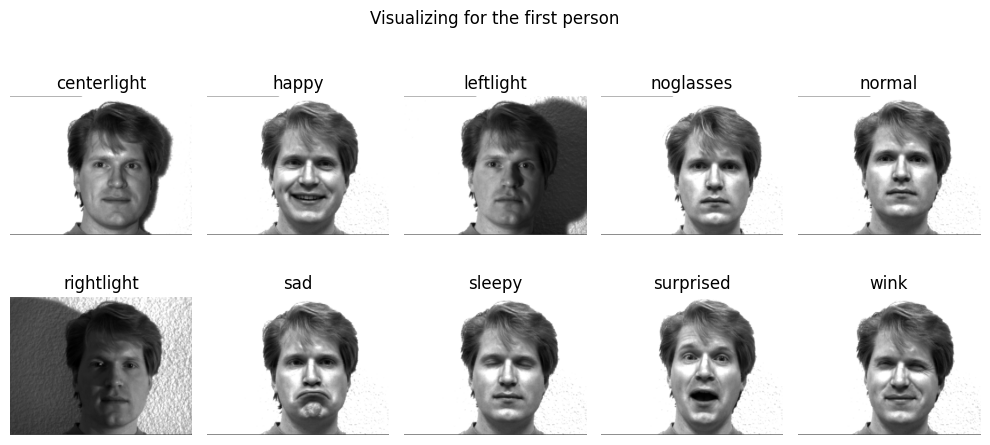

In [51]:
sample_dir = "./yalefaces/person-1"
plt.figure(figsize = (10, 5))
for i, filename in enumerate(os.listdir(sample_dir)):
    image = imread(os.path.join(sample_dir, filename))
    image = image.squeeze(0)
    print(f"Original size: {image.shape}")
    plt.subplot(2, 5, i+1)
    plt.imshow(image, cmap= "gray")
    plt.axis("off")
    plt.title(filename)
plt.suptitle("Visualizing for the first person")
plt.tight_layout()
plt.show()

#### Assignment 1 (4 scores): Implement PCA using Numpy.

In [52]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # mean
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        # covariance
        cov = np.cov(X.T)
        # eigen decomposition (real values guaranteed)
        eigenvalues, eigenvectors = np.linalg.eigh(cov)
        # sort eigenvectors by descending eigenvalues
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[:, idxs]
        # store first n eigenvectors
        self.components = eigenvectors[:, :self.n_components].T
        self.principle_values = eigenvalues[:self.n_components]


    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

#### Assignment 2 (4 scores):
- Reading the training images.
- Approximating the Principle Space having **20 dimensions**.
- Visualize the base of this Principle Space.

In [53]:
data = {}
for person in persons:
    person_dir = os.path.join(BASE, person)
    for file in os.listdir(person_dir):
        file_path = os.path.join(person_dir, file)
        image = imread(file_path)
        image = resize(image, (1, *size))
        if person not in data:
            data[person] = [image]
        else:
            data[person].append(image)

images = []
            
for person in data:
    data[person] = np.concatenate(data[person], axis = 0).reshape(10, -1)
    images.append(data[person])
    
images = np.concatenate(images, axis = 0)
images.shape

(150, 7500)

In [54]:
pca = PCA(n_components = 20)
pca.fit(images)

In [55]:
pca.components.shape

(20, 7500)

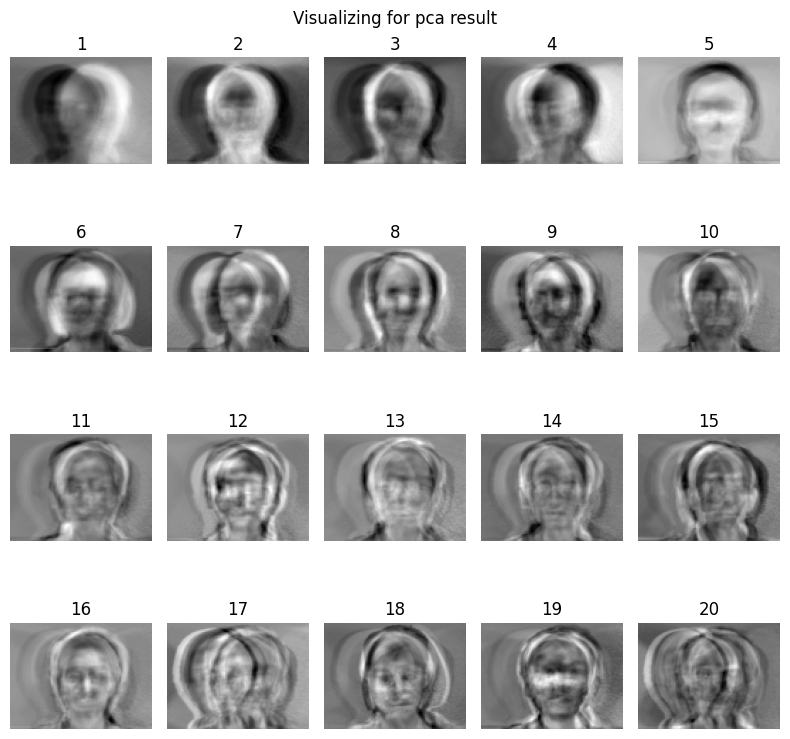

In [56]:
eigen_faces = pca.components.reshape(20, *size)
plt.figure(figsize=(8,8))
for i, eigen_face in enumerate(eigen_faces):
    plt.subplot(4, 5, i+1)
    plt.imshow(eigen_face, cmap="gray")
    plt.axis("off")
    plt.title(i+1)
    
plt.tight_layout()
plt.suptitle("Visualizing for pca result")
plt.show()

#### Assignment 3 (2 scores): 
- Assign persons to the face images in testing data.
- Evaluate the accuracy of this face recognition system.

In [57]:
projected_images = {}
for person in data:
    projected_images[person] = pca.transform(data[person])

In [58]:
labels = []
test_images = []
TEST_DIR = BASE + '/test'
for file_name in os.listdir(TEST_DIR):
    person_name = file_name.split(".")[0]
    labels.append(person_name)
    image = imread(os.path.join(TEST_DIR, file_name))
    image = resize(image, (1, *size))
    test_images.append(image)
    
test_images = np.concatenate(test_images, axis = 0)
print(test_images.shape)
print(labels)

(15, 75, 100)
['person-1', 'person-10', 'person-11', 'person-12', 'person-13', 'person-14', 'person-15', 'person-2', 'person-3', 'person-4', 'person-5', 'person-6', 'person-7', 'person-8', 'person-9']


In [59]:
def Euclid_Distance(a, b):
    return np.sqrt(((a-b)**2).sum())

In [67]:
predictions = {}
for label, image in zip(labels, test_images):
    image = image.reshape(-1)
    projected = pca.transform(image)
    closet_dist = np.inf
    closet_per = None

    for person in projected_images:
        projected_face = projected_images[person]
        distances = [Euclid_Distance(train_face, projected) for train_face in projected_images[person]]
        distance = min(distances)
        
        if distance < closet_dist:
            closet_dist = distance
            closet_per = person
    predictions[label] = closet_per

In [68]:
acc = np.sum([predictions[label] == label for label in labels]) / len(labels)
print(f"Accuracy: {acc:.2f}%")

Accuracy: 0.80%
